<h1 style="color:purple; text-align:center;">Lead Scoring Case Study - July 2023</h1> 
<h2 style="color:purple;">Group Members:</h2>

<ul>
    <li style="color:purple;">Vikas Tunwal</li>
    <li style="color:purple;">Anuj Kumar Tiwari</li>
    <li style="color:purple;">Trang Thuy Van </li>
</ul>

<h2 style="color:purple;">Problem Statement:</h2>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


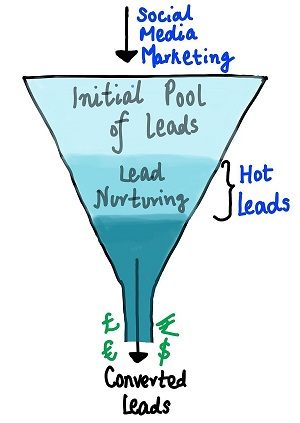

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

Results Expected
A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

You need to submit the following four components:

Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
Word File: Answer all the questions asked by the company in the word document provided.
Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
PDF File: Write the summary report in a word file and submit it as a PDF.


## Importanting the required libaries and packages

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# #Increase the limit for #columns
# pd.options.display.max_columns = None
# pd.options.display.max_rows = 150
# pd.options.display.float_format = '{:.2f}'.format

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:blue;">Reading and Understanding the data</h1>

In [2]:
#loading the dataset
df_leads = pd.read_csv('Leads.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Leads.csv'

In [ ]:
#let's look at the first few entries from the dataset
df_leads.head()

In [ ]:
#Let's understand the structure, datatypes and null values in our dataset
df_leads.info()

In [ ]:
# let's look at the statistical summary of the dataset
df_leads.describe()

<h1 style="color:blue;">Data preparations and EDA</h1>

In [ ]:
#check for any duplicates
print("No. of duplicate entries in the dataset = ", df_leads.duplicated().sum())

<font color = "purple">
No duplicate rows are observed

 As mentioned in the problem statement `"Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?)"` we need to replace this with NaN

In [ ]:
# let's convert the value 'Select' to NaN as it is a result of no selections from 'non-mandatory dropdown fields'
df_leads = df_leads.replace('Select', np.nan)


 <font color=purple>
    Let's inspect the dataset for columns having null values.

In [ ]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

In [ ]:
#let's identify the columns with more than 40% missing values
cols_to_drop = list(cols_with_nulls[cols_with_nulls>40].index)
cols_to_drop

<font color=purple>
    Let's also check the correlation using Heatmap to visualise the correlation amog the features

In [ ]:
# Checking corelation for numerical columns
sns.heatmap(df_leads.corr(),annot=True,cmap="YlGnBu")
plt.show()

<font color = "blue">
We can safely drop the columns with more than 40% null values as they would be insignificant in deriving inferences. Depending on the model performance, we can further revisit the correlation and see if treating the null values for some of the features which are having fractional correlation with the target variable. For now, we take the threshold of 40% to drop the columns.

In [ ]:
#Making a list of columns to be removed, we are adding few more columns which seem insignificant
cols_to_drop.extend(['Prospect ID','Lead Number', 'City', 'Country']) 
cols_to_drop

In [ ]:
#drop the identified columns from dataframe
df_leads = df_leads.drop(labels = cols_to_drop, axis=1)

In [ ]:
df_leads.shape

In [ ]:
df_leads.head(5)

In [ ]:
#Let's inspect the dataset again for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

<font color="blue">
Inspecting feature: Specialization

In [ ]:
# percentage distribution of values for the 'Specialization' column
df_leads['Specialization'].value_counts(normalize=True) * 100


In [ ]:
#imputing the missing values as 'Others'
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [ ]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [ ]:
df_leads['Specialization'].value_counts(normalize=True) * 100

<font color="blue">
Inspecting feature: Tags

In [ ]:
# percentage distribution of values for the 'Tags' column
df_leads['Tags'].value_counts(normalize=True) * 100


In [ ]:
#imputing the missing values as 'Will revert after reading the email'
df_leads['Tags'] = df_leads['Tags'].replace(np.nan, 'Will revert after reading the email')

<font color="blue">
Inspecting feature: What matters most to you in choosing a course

In [ ]:
# percentage distribution of values for the 'What matters most to you in choosing a course' column
df_leads['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

In [ ]:
# we can impute the missing value with the mode for the column
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

<font color="blue">
Inspecting feature: What is your current occupation

In [ ]:
# percentage distribution of values for the 'What is your current occupation' column
df_leads['What is your current occupation'].value_counts(normalize=True) * 100


In [ ]:
# we can impute the missing value with the mode for the column
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [ ]:
# Identifying the categorical columns
categorical_columns = df_leads.select_dtypes(include=['object', 'category']).columns
categorical_columns

In [ ]:
# Setting up the grid for the subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(12, 5*len(categorical_columns)))

# Looping through categorical columns and creating a plot for each
for ax, column in zip(axes, categorical_columns):
    # Creating the countplot
    sns.countplot(x=column, data=df_leads, ax=ax)
    
    # Setting the x-label as the column name
    ax.set_xlabel(column, fontsize=12)
    
    # Rotating x-axis labels for readability
    ax.tick_params(axis='x', rotation=90)
    
    # Annotating the bars with their respective heights
    for patch in ax.patches:
        ax.annotate(f'{patch.get_height():.0f}', 
                    (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# Adjusting the layout to prevent overlap
fig.tight_layout()
plt.show()


From the above visualization, we can see that there two categores of columns which can be dropped

1. Columns with only one value:

- 'I agree to pay the amount through cheque',
- 'Get updates on DM Content',
- 'Update me on Supply Chain Content',
- 'Receive More Updates About Our Courses',
- 'Magazine'



2. Columns which are highly skewed

- 'Do Not Call',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations'.

In [ ]:
# drop the columns
cols_to_drop = ['Magazine',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque',
                'Do Not Call',
                'Search',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations']

df_leads.drop(cols_to_drop,axis=1,inplace=True)
df_leads.columns

In [ ]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

In [ ]:
#we impute the missing values with the median for the column 'Page View Per Visit'
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].replace(np.nan, df_leads['Page Views Per Visit'].median())

In [ ]:
#we impute the missing values with the median for the column 'TotalVisits'
df_leads['TotalVisits'] = df_leads['TotalVisits'].replace(np.nan, df_leads['TotalVisits'].median())

In [ ]:
# For rest of the missing values, we just drop them
df_leads.dropna(inplace = True)

In [ ]:
#Let's inspect the dataset for null values
cols_with_nulls = df_leads.isnull().mean() * 100
cols_with_nulls [cols_with_nulls > 0.00].sort_values(ascending=False)

<font color = blue>
    We see no more missing values in the DataFrame.
    



## Univariate Analysis

#### For column's Country, What is your current occupation and What matters most to you in choosing a course the values looks highly skewed towards India, Unemployed and Better Career Prospects respectively so it would be safe to drop these columns

In [ ]:
df_leads.head()

#### Checking different categories of categorical column

In [ ]:
# Obtain numerical and categorical columns from the DataFrame
num_cols = list(df_leads.describe().columns)
cat_cols = [x for x in list(df_leads.columns) if x not in num_cols]

# Create a summary of categorical columns
cat_desc = df_leads[cat_cols].describe().T

# Calculate the percentage of the most frequent value in each categorical column
cat_desc['top_perc'] = 100 * cat_desc['freq'] / cat_desc['count']

# Sort the cat_desc DataFrame in descending order of top_perc
cat_desc_sorted = cat_desc.sort_values(by='top_perc', ascending=False)
cat_desc_sorted


In [ ]:
# let's drop column's with values skewed more than 90%
drop_cols = list(cat_desc[cat_desc['top_perc'] > 90].index)
drop_cols

In [ ]:
df_leads= df_leads.drop(labels = drop_cols, axis=1)

In [ ]:
df_leads.head(3)

In [ ]:
df_leads.info()

#### Mapping 'Yes': 1, 'No': 0 for the columns with only Yes and No

In [ ]:
# Define a mapping function for binary values
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Apply the binary mapping function to the specified variables in the df_leads DataFrame
df_leads[['A free copy of Mastering The Interview']] = df_leads[['A free copy of Mastering The Interview']].apply(binary_map)


In [ ]:
df_leads.head()

### Let's check for the otliers in the numerical columns 


In [ ]:
df_leads.describe()

We can see that the columns 'TotalVisits', 'Page View Per Visit' and 'Total Time Spent on Website' shows a significant deviation for the max from 75% of the data. This indicates presence of outliers. We can observe the same by plotting them.

In [ ]:
#let's visualize the columns via boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

In [ ]:
# Identify outliers in the 'TotalVisits' column and cap them at the 95th percentile
percentiles = df_leads['TotalVisits'].quantile([0.05, 0.90]).values
lower_cutoff = percentiles[0]
upper_cutoff = percentiles[1]

# Cap the outliers below the lower cutoff
df_leads.loc[df_leads['TotalVisits'] <= lower_cutoff, 'TotalVisits'] = lower_cutoff

# Cap the outliers above the upper cutoff
df_leads.loc[df_leads['TotalVisits'] >= upper_cutoff, 'TotalVisits'] = upper_cutoff


In [ ]:
# Identify outliers in the 'Page Views Per Visit' column and cap them at the 95th percentile
percentiles = df_leads['Page Views Per Visit'].quantile([0.05, 0.95]).values
lower_cutoff = percentiles[0]
upper_cutoff = percentiles[1]

# Cap the outliers below the lower cutoff
df_leads.loc[df_leads['Page Views Per Visit'] <= lower_cutoff, 'Page Views Per Visit'] = lower_cutoff

# Cap the outliers above the upper cutoff
df_leads.loc[df_leads['Page Views Per Visit'] >= upper_cutoff, 'Page Views Per Visit'] = upper_cutoff


In [ ]:
#let's visualize the columns via boxplot
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

### Bivariate Analysis

### Let's check the distribution of catagorical columns now

In [ ]:
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
cat_cols = [x for x in list(df_leads.columns) if x not in cols]


In [ ]:
plt.figure(figsize=[15, 30])
num_cat_cols = df_leads[cat_cols].shape[1]
# Generate count plots for each categorical column
for i in range(num_cat_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(df_leads[cat_cols].iloc[:, i], hue=df_leads["Converted"])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(df_leads[cat_cols].columns[i])
    plt.tight_layout(pad=3.0)


#### For the features showing distribution near zero

In [ ]:
# Replace certain values in the 'Tags' column with 'Other_Tags'
tags_to_replace = ['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                   'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup',
                   'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student',
                   'Interested in Next batch', 'Recognition issue (DEC approval)',
                   'Want to take admission but has financial problems', 'University not recognized']
df_leads['Tags'] = df_leads['Tags'].replace(tags_to_replace, 'Other_Tags')

# Replace specific values in the 'Lead Source' column with 'Google' and 'Others'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')
other_lead_sources = ['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                      'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel', 'Facebook']
df_leads['Lead Source'] = df_leads['Lead Source'].replace(other_lead_sources, 'Others')

# Replace certain values in the 'Last Activity' column with 'Other_Activity'
activity_to_replace = ['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow',
                       'Approached upfront', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam',
                       'Unsubscribed']
df_leads['Last Activity'] = df_leads['Last Activity'].replace(activity_to_replace, 'Other_Activity')

# Replace certain values in the 'Specialization' column with 'Other_Specialization'
specializations_to_replace = ['Others', 'E-Business', 'Rural and Agribusiness', 'Services Excellence']
df_leads['Specialization'] = df_leads['Specialization'].replace(specializations_to_replace, 'Other_Specialization')

# Replace specific values in the 'What is your current occupation' column with 'Other_Occupation'
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(['Other', 'Housewife'], 'Other_Occupation')

# Replace certain values in the 'Last Notable Activity' column with 'Other_Activity'
notable_activities_to_replace = ['Email Bounced', 'Email Marked Spam', 'Email Received', 'Form Submitted on Website',
                                 'Had a Phone Conversation', 'Resubscribed to emails', 'Unreachable', 'Unsubscribed',
                                 'View in browser link Clicked']
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(notable_activities_to_replace, 'Other_Activity')


In [ ]:
# let's verify the distribution of catagorical columns again
    
plt.figure(figsize=[15, 45])

for i, col in enumerate(cat_cols):
    plt.subplot(6, 2, i+1)
    sns.countplot(x=col, hue="Converted", data=df_leads)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout(pad=3.0)

### Let's create Dummy Variables for the categorical columns

In [ ]:
# Obtaining the list of numerical columns
num_cols = list(df_leads.describe().columns)

# Obtaining the list of categorical columns
cat_cols = [col for col in df_leads.columns if col not in num_cols]

# Generating descriptive statistics for categorical columns
cat_desc = df_leads[cat_cols].describe().T

# Creating a list of column names suitable for creating dummy variables
col_dummy = list(cat_desc.index)


In [ ]:
# Create dummy variables for selected categorical variables, dropping the first one
dummy1 = pd.get_dummies(df_leads[col_dummy], drop_first=True)

# Add the dummy variable results to the master dataframe
df_leads = pd.concat([df_leads, dummy1], axis=1)


In [ ]:
# Remove the original categorical variables from the dataframe
df_leads = df_leads.drop(labels=col_dummy, axis=1)

# Display the first 5 rows of the updated dataframe
df_leads.head(5)


#### Checking Catagorical Columns

In [ ]:
# Extraction of non-numeric columns
numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']
categorical_variables = [variable for variable in df_leads.columns if variable not in numeric_columns]

# Initialize the figure dimensions
plt.figure(figsize=[15, 200])
total_categorical_vars = len(categorical_variables)

# Create count plots for each of the categorical variables
for index in range(total_categorical_vars):
    plt.subplot(100, 2, index+1)
    sns.countplot(x=categorical_variables[index], data=df_leads, hue="Converted")
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)
    plt.title(categorical_variables[index])
    plt.tight_layout(pad=3.0)


##### Some important inferences: -

###### The presence of the following features often indicates a higher likelihood of lead conversion:
- Tags_Closed by Horizzon
- Tags_Lost to EINS
- Tags_Will revert after reading the email
- Tags_Busy
- Lead Origin_Lead Add Form

###### Contrarily, the presence of the following features typically signals a lower chance of lead conversion:
- Tags_switched off
- Last Notable Activity_Olark Chat Conversation

### Test-Train Split

In [ ]:
# let's segregate the dependent and independent variables
X = df_leads.drop(columns=['Converted'])
y = df_leads['Converted']


In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling of Features

In [ ]:
columns_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


# Instantiate the object
scaler_instance = StandardScaler()
# Apply fit_transform
X_train[columns_to_scale] = scaler_instance.fit_transform(X_train[columns_to_scale])


In [ ]:
X_train.head()


In [ ]:
fig, ax = plt.subplots(figsize=(50, 40))
correlation_heatmap = sns.heatmap(df_leads.corr(), annot=True, cmap='coolwarm', ax=ax)
correlation_heatmap.plot()
plt.show()

<font color = purple>
    
**Key Insights from the Correlation:**



1. **'Converted' & 'Total Time Spent on Website' / 'Last Notable Activity_SMS Sent':** 
   - 'Converted' has a positive correlation with these factors. This suggests that the more time a person spends on the website, and if they received an SMS, they are more likely to convert.

    
2. **'TotalVisits' & 'Page Views Per Visit':**
   - These two are highly positively correlated. This implies that the more visits a user makes, the more pages they view per visit.

    
3. **'Total Time Spent on Website' & 'TotalVisits' / 'Page Views Per Visit':**
   - 'Total Time Spent on Website' is positively correlated with 'TotalVisits' and 'Page Views Per Visit', indicating that as users visit more pages and more frequently, they tend to spend more time on the website.

    
4. **'Converted' & 'A free copy of Mastering The Interview' / 'Last Notable Activity_Modified':**
   - 'Converted' has a negative correlation with these factors, which indicates that people who requested a free copy of the interview guide or had their last notable activity listed as 'Modified' are less likely to convert.

    
5. **'Lead Source_Olark Chat' & 'TotalVisits':**
   - There's also a strong negative correlation between these two. This could mean that the people who interact through Olark Chat tend to visit the website less frequently.


### Feature selection using RFE

In [ ]:
#instantiate the object
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

# Model Building

### Model # 1

In [ ]:
# Building the logistic regression model using the statsmodels library
X_train_with_const = sm.add_constant(X_train[col])
logistic_regression_model = sm.GLM(y_train, X_train_with_const, family = sm.families.Binomial())
model_result = logistic_regression_model.fit()
model_result.summary()


#### Let's check VIF scores

In [ ]:
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, index) for index in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)

# Sorting the features based on the VIF values in descending order
vif_data = vif_data.sort_values(by = "VIF", ascending = False)

vif_data

<font color=red>
    The below variables show high p-value

1. Tags_wrong number given - 0.999
2. Tags_invalid number - 0.320
3. Lead Source_Welingak Website - 0.014
    
    
Also, the variable `What is your current occupation_Unemployed` shows very high VIF
    

### Model # 2

In [ ]:
# Exclude 'What is your current occupation_Unemployed' from the model due to high VIF 
col = col.drop('What is your current occupation_Unemployed', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_2.fit()
result.summary()


In [ ]:

# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

So overall the accuracy hasn't dropped much.

<font color=red>
    The below variables show high p-value

1. Tags_wrong number given - 0.999
2. Tags_invalid number - 0.257
3. Lead Source_Welingak Website - 0.016
    
    
The VIF score for the rest of the columns look ok.
    

### Model #3

In [ ]:
# Exclude 'Tags_wrong number given' from the model due to high p-value 
col = col.drop('Tags_wrong number given', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_3.fit()
result.summary()


In [ ]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

<font color=red>
    The below variables show high p-value

1. Tags_invalid number - 0.305
2. Lead Source_Welingak Website - 0.016
    
    
The VIF score for the rest of the columns look ok.
    

### Model #4

In [ ]:
# Exclude 'Tags_invalid numbe' from the model due to high p-value 
col = col.drop('Tags_invalid number', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_4.fit()
result.summary()

In [ ]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

### Model #5

In [ ]:
# Exclude 'Lead Source_Welingak Website' from the model due to relatively high p-value 
col = col.drop('Lead Source_Welingak Website', 1)

# Re-evaluate the model with the refined set of variables
X_train_sm = sm.add_constant(X_train[col])
logistic_regression_model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logistic_regression_model_5.fit()
result.summary()

In [ ]:
# Calculate and display the VIF values for each feature in the model
vif_data = pd.DataFrame()
vif_data['Features'] = X_train[col].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif_data['VIF'] = round(vif_data['VIF'], 2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

<font color = blue>
    
- all the variables show low VIF score, signifying that the multicollinearity is not a concern here
- Tags_Closed by Horizzon' and 'Tags_Lost to EINS' have a very high positive coefficient, suggesting that these tags have a significant impact on 
- Low p-value of the variables shows that model variables contribute significantly to predicting the conversion.

In [ ]:
# Compute the predicted values for the training dataset
y_train_predicted = result.predict(X_train_sm)
y_train_predicted.head(10)

In [ ]:
# Display the first 10 elements of the y_train_predicted array
y_train_predicted[:10]

##### Constructing a DataFrame with the actual 'churn' indicators and the computed prediction probabilities.

In [ ]:
# Construct a DataFrame that contains the actual 'Converted' values and the predicted probabilities
prediction_df = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_predicted})
prediction_df['Customer_ID'] = y_train.index
prediction_df.head()


##### Generating a new column named 'predicted', which will contain 1 if 'Churn_Prob' is greater than 0.5, otherwise 0.

In [ ]:
# Assigning 1 to 'predicted' if 'Converted_Prob' is greater than 0.5, else 0
prediction_df['predicted'] = prediction_df.Converted_Prob.apply(lambda x: 1 if x > 0.5 else 0)
prediction_df.head()


In [ ]:
# Generating the confusion matrix 
conf_matrix = metrics.confusion_matrix(prediction_df['Converted'], prediction_df['predicted'])
print(conf_matrix)

 <font color=blue>
    NOTE: -



|                    | Predicted Not Converted | Predicted Converted |
|--------------------|:-----------------------:|:-------------------:|
| Actual Not Converted |           3648          |         273         |
| Actual Converted   |           389           |        2062         |


In [ ]:
# Assessing the overall model accuracy.
print(metrics.accuracy_score(prediction_df['Converted'], prediction_df['predicted']))

## Additional Metrics Beyond Mere Accuracy

In [ ]:
# Assigning values from the confusion matrix
TP = conf_matrix[1,1] # True Positives
TN = conf_matrix[0,0] # True Negatives
FP = conf_matrix[0,1] # False Positives
FN = conf_matrix[1,0] # False Negatives


print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

### Creating the ROC curve

In [ ]:
# Define a function to plot the ROC curve
def plot_roc_curve(actuals, predicted_probabilities):

    fpr, tpr, thresholds = metrics.roc_curve(actuals, predicted_probabilities, drop_intermediate = False)

    auc_score = metrics.roc_auc_score(actuals, predicted_probabilities)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# let's plot the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(prediction_df.Converted, prediction_df.Converted_Prob, drop_intermediate = False)
plot_roc_curve(prediction_df.Converted, prediction_df.Converted_Prob)

### Determining the Optimal Cutoff Point

In [ ]:
# Create columns with different probability thresholds
prob_thresholds = [float(x)/10 for x in range(10)]
for threshold in prob_thresholds:
    prediction_df[threshold] = prediction_df.Converted_Prob.map(lambda x: 1 if x > threshold else 0)
prediction_df.head()


In [ ]:
# Calculate accuracy, sensitivity, and specificity for various probability thresholds.
cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensitivity', 'specificity'])

thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    cm = metrics.confusion_matrix(prediction_df.Converted, prediction_df[threshold])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    cutoff_df.loc[threshold] = [threshold, accuracy, sensitivity, specificity]
cutoff_df

In [ ]:
# let's plot accuracy, sensitivity, and specificity for different probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

### <font color= red> According to the plot above, the best cutoff probability is 0.35.


In [ ]:
# Make predictions on the training set using the final model
prediction_df['final_predicted'] = prediction_df.Converted_Prob.apply(lambda x: 1 if x > 0.35 else 0)
prediction_df.head()

In [ ]:
# Calculate the total accuracy of the model
total_accuracy = metrics.accuracy_score(prediction_df.Converted, prediction_df.final_predicted)
total_accuracy

In [ ]:
# Create a confusion matrix to see how the model performed
confusion_matrix = metrics.confusion_matrix(prediction_df.Converted, prediction_df.final_predicted)
confusion_matrix


In [ ]:
TP = confusion_matrix[1,1] # True positives
TN = confusion_matrix[0,0] # True negatives
FP = confusion_matrix[0,1] # False positives
FN = confusion_matrix[1,0] # False negatives

print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

## Let's evaluate Precision and Recall

#### Precision

In [ ]:
precision_score(prediction_df.Converted, prediction_df.predicted)

#### Recall

In [ ]:
recall_score(prediction_df.Converted, prediction_df.predicted)

<font color=blue>While the precision-recall threshold stands at 0.41, our priority is to optimize sensitivity. Hence, we will be using the threshold determined by accuracy, sensitivity, and specificity, which is 0.35.

## Trade-off between Precision and Recall


In [ ]:
# Compute Precision-Recall pairs for different probability thresholds 
precision_score, recall_score, thresholds = precision_recall_curve(prediction_df.Converted, prediction_df.Converted_Prob)

In [ ]:
# Plot the Precision-Recall curve
plt.plot(thresholds, precision_score[:-1], 'g-', label='Precision')
plt.plot(thresholds, recall_score[:-1], 'r-', label='Recall')
plt.legend()
plt.show()

 <font color=blue> 
    Note:     
    
While the precision-recall threshold stands at 0.41, our priority is to optimize sensitivity. Hence, we will be using the threshold determined by accuracy, sensitivity, and specificity, which is 0.35.

# Predictions on the test dataset

In [ ]:
# Apply standardization to the specific columns of test set
columns_to_standardize = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[columns_to_standardize] = scaler_instance.transform(X_test[columns_to_standardize])
X_test = X_test[col]

In [ ]:
X_test.head()

In [ ]:
# let's add the constant to test set
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = result.predict(X_test_sm)
y_test_pred.head(10)

In [ ]:
# Transform y_test_pred into a DataFrame
pred_df = pd.DataFrame(y_test_pred)
pred_df.head()

In [ ]:
# Change y_test to a DataFrame and assign CustID to the index
test_df = pd.DataFrame(y_test)
test_df['CustID'] = test_df.index

In [ ]:
# Concatenate test_df and pred_df
pred_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
final_pred_df = pd.concat([test_df, pred_df], axis=1)
final_pred_df.head()

In [ ]:
# let's rename the column
final_pred_df = final_pred_df.rename(columns={0: 'Prob_Converted'})

In [ ]:
# Reorder the columns
final_pred_df = final_pred_df[['CustID', 'Converted', 'Prob_Converted']]
final_pred_df.head()

In [ ]:
# Create 'final_predicted' column using .35 as the cutoff for 'Converted_Prob'
final_pred_df['final_predicted'] = final_pred_df['Prob_Converted'].apply(lambda val: 1 if val > 0.35 else 0)
final_pred_df.head()

In [ ]:
#model accuracy
metrics.accuracy_score(final_pred_df.Converted, final_pred_df.final_predicted)

In [ ]:
confusion_matrix = metrics.confusion_matrix(final_pred_df.Converted, final_pred_df.final_predicted )
confusion_matrix

In [ ]:
# Assigning values from the confusion matrix
TP = confusion_matrix[1,1] # True Positives
TN = confusion_matrix[0,0] # True Negatives
FP = confusion_matrix[0,1] # False Positives
FN = confusion_matrix[1,0] # False Negatives


print("Sensitivity or True Positive Rate of our logistic regression model : ", TP / float(TP + FN))
print("Specificity or True Negative Rate                                  : ",TN / float(TN + FP))
print("False Positive Rate                                                : ",FP / float(TN + FP))
print("Positive Predictive Value                                          : ",TP / float(TP + FP))
print("Negative Predictive Value                                          : ",TN / float(TN + FN))

In [ ]:
result.summary()

**🔔 Summary: Key Factors Influencing Lead Conversion 🔔**

We've identified several major contributors to lead conversion based on our analysis. Here they are, along with their respective coefficients:

🔹 **Tags_Closed by Horizzon:** Coefficient - 8.9448 

🔹 **Tags_Lost to EINS:** Coefficient - 8.5327

🔹 **Tags_Will revert after reading the email:** Coefficient - 3.4580

🔹 **Tags_Busy:** Coefficient - 3.1989

🔹 **Lead Origin_Lead Add Form:** Coefficient - 3.0088

🔹 **What is your current occupation_Working Professional:** Coefficient - 2.5377

🔹 **Last Notable Activity_SMS Sent:** Coefficient - 2.0579

These attributes represent the most influential drivers of lead conversion. Optimizing these factors could significantly increase the conversion rate.